# Part 1

12111012 匡亮

In [1]:
from perceptron import Perceptron
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Task 1

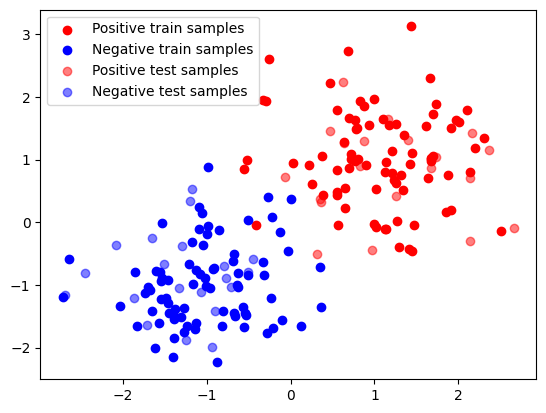

Training samples: 80 positive samples, 80 negative samples
Testing samples: 20 positive samples, 20 negative samples


In [2]:
def _generate_dataset_one_label(label, d, n, mean, std, test_size):
    mean = np.full(d, mean)
    std = np.full(d, std)
    X = np.random.normal(mean, std, size=(n, d))
    y = np.array([label] * n)
    return train_test_split(X, y, test_size=test_size)
    

def generate_dataset(d=2, n_pos=100, n_neg=100, mean_pos=1.0, mean_neg=-1.0, std_pos=0.7, std_neg=0.7, test_size=0.2):
    
    # Note: This slightly lengthy code is intended to STRICTLY meet the requirement of "Keep 80 points per distribution as the training...".
    
    pos_train_data, pos_test_data, pos_train_labels, pos_test_labels = \
        _generate_dataset_one_label(1, d, n_pos, mean_pos, std_pos, test_size)
    neg_train_data, neg_test_data, neg_train_labels, neg_test_labels = \
        _generate_dataset_one_label(-1, d, n_neg, mean_neg, std_neg, test_size)
    return (np.vstack((pos_train_data, neg_train_data)),
            np.vstack((pos_test_data, neg_test_data)),
            np.hstack((pos_train_labels, neg_train_labels)),
            np.hstack((pos_test_labels, neg_test_labels)))


# Test
train_data, test_data, train_labels, test_labels = generate_dataset()
plt.scatter(train_data[train_labels == 1][:, 0], train_data[train_labels == 1][:, 1], 
            color='red', label='Positive train samples', alpha=1)
plt.scatter(train_data[train_labels == -1][:, 0], train_data[train_labels == -1][:, 1], 
            color='blue', label='Negative train samples', alpha=1)
plt.scatter(test_data[test_labels == 1][:, 0], test_data[test_labels == 1][:, 1], 
            color='red', label='Positive test samples', alpha=0.5)
plt.scatter(test_data[test_labels == -1][:, 0], test_data[test_labels == -1][:, 1], 
            color='blue', label='Negative test samples', alpha=0.5)
plt.legend()
plt.show()
print(f'Training samples: {len(train_data[train_labels == 1])} positive samples, {len(train_data[train_labels == -1])} negative samples')
print(f'Testing samples: {len(test_data[test_labels == 1])} positive samples, {len(test_data[test_labels == -1])} negative samples')

# Task 2

See ```perceptron.py```

# Task 3

In [3]:
def train_and_test(model: Perceptron, dataset):
    train_data, test_data, train_labels, test_labels = dataset
    # train
    model.train(train_data, train_labels)
    # test
    correct = 0
    for (x, y) in zip(test_data, test_labels):
        prediction = model.forward(x)
        if y == prediction:
            correct += 1
    print("Test accuracy = %f" % (correct / len(test_labels)))

# Test
train_and_test(Perceptron(2), generate_dataset())

Test accuracy = 0.950000


# Task 4

A perceptron trained on a 2-D plane has a linear decision boundary, which can be directly computed from its weights. Therefore, we show the line in the experiments below to visually display the results.

The perceptron performs well when the dataset is almost linear separable, but is very fragile when there are small proportion of positive and negative samples mixed (i.e. the means are closer or the variances are higher), and is often trapped in local optimal.

Test accuracy = 0.975000
Test accuracy = 0.825000
Test accuracy = 0.875000
Test accuracy = 0.950000


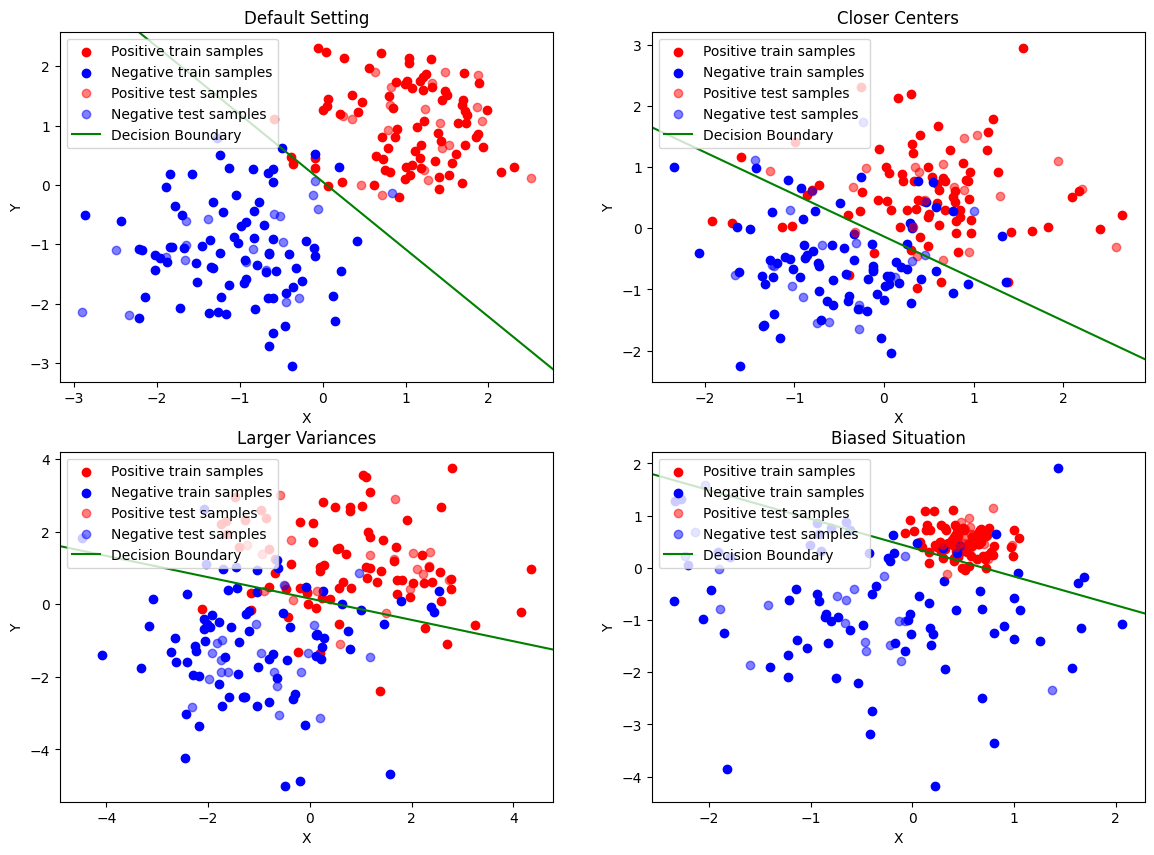

In [4]:
def plot(desc, figure, dataset, model, show_history=False):
    if show_history:
        train_data, test_data, train_labels, test_labels = dataset
        figure.scatter(train_data[train_labels == 1][:, 0], train_data[train_labels == 1][:, 1], 
                    color='red', label='Positive train samples', alpha=1)
        figure.scatter(train_data[train_labels == -1][:, 0], train_data[train_labels == -1][:, 1], 
                    color='blue', label='Negative train samples', alpha=1)
        figure.scatter(test_data[test_labels == 1][:, 0], test_data[test_labels == 1][:, 1], 
                    color='red', label='Positive test samples', alpha=0.5)
        figure.scatter(test_data[test_labels == -1][:, 0], test_data[test_labels == -1][:, 1], 
                    color='blue', label='Negative test samples', alpha=0.5)
        alpha = 0.01
        for w in model.weights_history:
            alpha = min(1, alpha + 1 / len(model.weights_history))
            (b, w0, w1) = w
            figure.axline((0, -b/w1), slope=-w0/w1, color='green', alpha=alpha)
        figure.set_title(desc)
        figure.set_xlabel('X')
        figure.set_ylabel('Y')
    else:
        train_data, test_data, train_labels, test_labels = dataset
        figure.scatter(train_data[train_labels == 1][:, 0], train_data[train_labels == 1][:, 1], 
                    color='red', label='Positive train samples', alpha=1)
        figure.scatter(train_data[train_labels == -1][:, 0], train_data[train_labels == -1][:, 1], 
                    color='blue', label='Negative train samples', alpha=1)
        figure.scatter(test_data[test_labels == 1][:, 0], test_data[test_labels == 1][:, 1], 
                    color='red', label='Positive test samples', alpha=0.5)
        figure.scatter(test_data[test_labels == -1][:, 0], test_data[test_labels == -1][:, 1], 
                    color='blue', label='Negative test samples', alpha=0.5)
        (b, w0, w1) = model.weights  # The decision boundary
        figure.axline((0, -b/w1), slope=-w0/w1, color='green', label='Decision Boundary')
        figure.set_title(desc)
        figure.set_xlabel('X')
        figure.set_ylabel('Y')
        figure.legend(loc='upper left')


# Test
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Default setting
model = Perceptron(2)
dataset = generate_dataset()
train_and_test(model, dataset)
plot(desc='Default Setting', figure=axs[0][0], model=model, dataset=dataset)

# Other settings
model = Perceptron(2)
dataset = generate_dataset(mean_pos=0.5, mean_neg=-0.5)
train_and_test(model, dataset)
plot(desc='Closer Centers', figure=axs[0][1], model=model, dataset=dataset)

model = Perceptron(2)
dataset = generate_dataset(std_pos=1.25, std_neg=1.25)
train_and_test(model, dataset)
plot(desc='Larger Variances', figure=axs[1][0], model=model, dataset=dataset)

model = Perceptron(2)
dataset = generate_dataset(mean_pos=0.5, mean_neg=-0.5, std_pos=0.25, std_neg=1)
train_and_test(model, dataset)
plot(desc='Biased Situation', figure=axs[1][1], model=model, dataset=dataset)

# Result
plt.show()

Test accuracy = 0.975000
Test accuracy = 0.875000
Test accuracy = 0.775000
Test accuracy = 0.850000


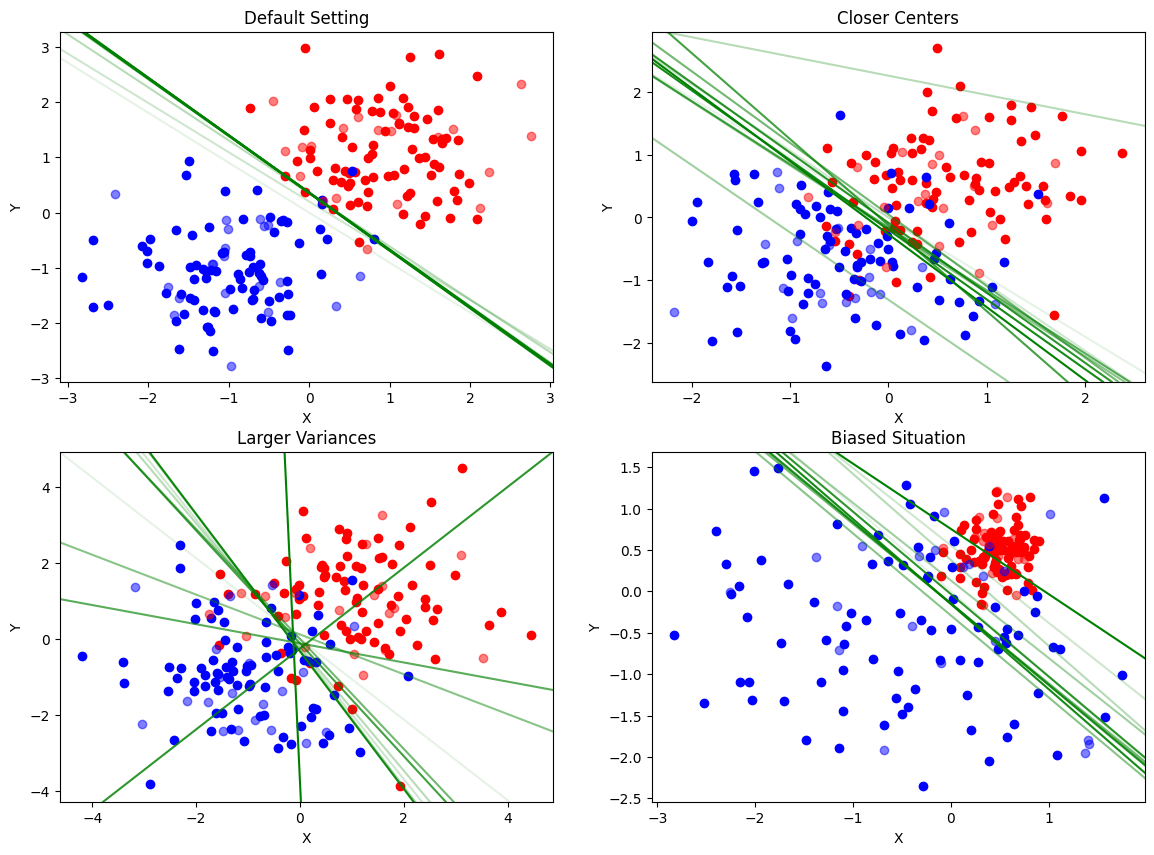

In [31]:
# Test - show history
_, axs = plt.subplots(2, 2, figsize=(14, 10))

# Default setting
model = Perceptron(2)
dataset = generate_dataset()
train_and_test(model, dataset)
plot(desc='Default Setting', figure=axs[0][0], model=model, dataset=dataset, show_history=True)

# Other settings
model = Perceptron(2)
dataset = generate_dataset(mean_pos=0.5, mean_neg=-0.5)
train_and_test(model, dataset)
plot(desc='Closer Centers', figure=axs[0][1], model=model, dataset=dataset, show_history=True)

model = Perceptron(2)
dataset = generate_dataset(std_pos=1.25, std_neg=1.25)
train_and_test(model, dataset)
plot(desc='Larger Variances', figure=axs[1][0], model=model, dataset=dataset, show_history=True)

model = Perceptron(2)
dataset = generate_dataset(mean_pos=0.5, mean_neg=-0.5, std_pos=0.25, std_neg=1)
train_and_test(model, dataset)
plot(desc='Biased Situation', figure=axs[1][1], model=model, dataset=dataset, show_history=True)

# Result
plt.show()